# 02750 HW2 

### Anushka Sinha (anushka3)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import warnings
import random
from sklearn.model_selection import train_test_split
import math
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss

# To ignore all warnings:
warnings.filterwarnings('ignore')

In [2]:
column_names = ["Attribute1", "Attribute2", "Attribute3", "Attribute4", "Attribute5", "Attribute6", "Attribute7", "Attribute8", "Attribute9", "Attribute10", 
                "Attribute11", "Attribute12", "Attribute13", "Attribute14", "Attribute15", "Attribute16", "Attribute17", "Attribute18", "Attribute19", "Attribute20", 
                "Attribute21", "Attribute22", "Attribute23", "Attribute24", "Attribute25", "Attribute26", "Attribute27", "Attribute28", "Attribute29", "Attribute30", 
                "Attribute31", "Attribute32", "Attribute33", "Attribute34", "Class"]
data = pd.read_csv("ionosphere/ionosphere.data", header=None, names=column_names)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
label_encoder = LabelEncoder()
data['Class_encoded'] = label_encoder.fit_transform(data['Class'])
data = data.drop(columns=['Class'])
data_array = data.to_numpy() # 351 x 35
print(data_array.shape)

(351, 35)


In [3]:
data

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Class_encoded
0,1,0,0.47090,0.22751,0.42328,0.33598,0.25661,0.47619,0.01852,0.49471,...,0.00265,0.03574,-0.31739,0.15873,-0.21693,0.24868,-0.24339,0.26720,0.04233,1
1,1,0,0.82254,-0.07572,0.80462,0.00231,0.87514,-0.01214,0.86821,-0.07514,...,-0.02370,0.76717,-0.02731,0.74046,-0.07630,0.70058,-0.04220,0.78439,0.01214,1
2,1,0,0.89589,0.39286,0.66129,0.71804,0.29521,0.90824,-0.04787,0.94415,...,-0.85703,0.53229,-0.68593,0.74846,-0.40656,0.83142,-0.07029,0.76862,0.27926,1
3,1,0,0.68729,1.00000,0.91973,-0.76087,0.81773,0.04348,0.76087,0.10702,...,-0.53846,0.89262,0.22216,0.71070,0.53846,1.00000,-0.06522,0.56522,0.23913,0
4,1,0,0.72414,-0.01084,0.79704,0.01084,0.80000,0.00197,0.79015,0.01084,...,-0.01478,0.78041,0.00612,0.74089,-0.05025,0.82956,0.02956,0.79015,0.00788,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0,1.00000,-1.00000,1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,...,-1.00000,1.00000,-1.00000,-1.00000,-1.00000,0.00000,0.00000,1.00000,-1.00000,0
347,1,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0.10976,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
348,1,0,1.00000,0.08013,0.96775,-0.00482,0.96683,-0.00722,0.87980,-0.03923,...,0.02003,0.93772,-0.03034,1.00000,-0.05843,0.92774,-0.03464,0.92226,-0.03673,1
349,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1


In [4]:
random_seeds = []
for i in range(5):
    random.seed(100*i)
    random_seeds.append(random.randint(1, 100))
random_seeds

[50, 19, 6, 77, 40]

In [5]:
def run_cross_fold_validation(model, train_X, train_y, weights, seed):
    
    """ 
    Split your training data at that round into 5 different sets of equal size (or as equal as they can be). 
    Train a model using 4 of the 5 sets. Assess that model on the remaining set. 
    Continue this process until each set has been used for assessment once. 
    Add up the errors from all 5 folds and divide by the total number of observed instances. 
    This will yield an average error that will not be severely biased by imbalances in the fold sizes. 
    This will give you a good estimate of the model performance given the data you have available to you at that round. 
    This will not necessarily give you an estimate of generalization performance
  """
    # Initialize KFold with 5 splits
    kf = KFold(n_splits=5, shuffle=True, random_state=seed)
    fold_accuracies = []

    for train_idx, test_idx in kf.split(train_X):
        # Split the data into training and testing sets for this fold
        X_train_fold, X_test_fold = train_X[train_idx], train_X[test_idx]
        y_train_fold, y_test_fold = train_y[train_idx], train_y[test_idx]
        weights_fold = weights[train_idx] 
        # Train a model on the training fold
        model.fit(X_train_fold, y_train_fold, sample_weight=weights_fold)

        # Predict on the testing fold
        y_pred_fold = model.predict(X_test_fold)

        # Calculate accuracy for this fold
        fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
        fold_accuracies.append(fold_accuracy)  # Store error rate

    # Calculate average error across all folds
    avg_acc = sum(fold_accuracies) / len(fold_accuracies)
    return avg_acc

In [6]:
# Rejection threshold subroutin
def rejection_threshold(t, b, k, pmin, train_X, H):
    train_X_reshaped = train_X.reshape(1, -1)
    disagreement = [[], []]
    for hi in H:
        for hj in H:
            if hi != hj:
                val_0 = calculate_loss(hi, hj, train_X_reshaped, [0])
                val_1 = calculate_loss(hi, hj, train_X_reshaped, [1])
                disagreement[0].append(val_0)
                disagreement[1].append(val_1)
   
    max_disagreement = np.max(disagreement)
    pt = pmin + (1 - pmin) * (max_disagreement)
    return pt


def calculate_loss(hi, hj, X, y_true):
    # Get the probabilities from the classifiers
    probs_hi = hi.predict_proba(X) 
    probs_hj = hj.predict_proba(X) 

    # Calculate the log loss for each classifier's predictions
    log_loss_hi = log_loss(y_true, probs_hi, labels=[0,1])
    log_loss_hj = log_loss(y_true, probs_hj, labels=[0,1])

    return log_loss_hi - log_loss_hj


In [9]:
def IWAL(data, seed, b, k):
    cross_fold_performance = []
    X, y = data[:, :-1], data[:, -1]
    X_train = np.empty((0, X.shape[1]))
    y_train = []

    initial_sample = data[:b, :]
    H = [RandomForestClassifier() for _ in range(k)]
    sample_data_X, sample_data_y = initial_sample[:, :-1], initial_sample[:, -1]
    for model in H:
        model.fit(sample_data_X, sample_data_y)
    
    pmin = 0.3
    weights = []
    mod= RandomForestClassifier(random_state=seed)
    for t in range(len(data)):
        if t<=b:
            pt = 1.0
            weights.append(pmin / pt) 
        else:
            pt = rejection_threshold(t, b, k, pmin, X[t], H)
        
        # Flip a biased coin to decide if we should label this instance
        if np.random.rand() <= pt:
            # Add the instance to the training set
            X_train = np.append(X_train, X[t].reshape(1, -1), axis=0)
            y_train = np.append(y_train, [y[t]])
            weights.append(pmin / pt) 
        
        if t >= b:
            cv_accuracy = run_cross_fold_validation(mod, X_train, y_train, np.array(weights), seed)
            cross_fold_performance.append(cv_accuracy)
        
    return cross_fold_performance
      

In [10]:
# Running IWAL simulation
cross_fold_accuracies = []
b = int(0.2*len(data_array))
k = 5
i = 1
for seed in tqdm(random_seeds):
    print("Simulation Number", i)
    i += 1
    cv_acc = IWAL(data_array, seed, b, k)
    cross_fold_accuracies.append(cv_acc)
    
avg_acc_IWAL = np.mean(cross_fold_accuracies, axis=0)
std_acc_IWAL = np.std(cross_fold_accuracies, axis=0)

  0%|          | 0/5 [00:00<?, ?it/s]

Simulation Number 1


 20%|██        | 1/5 [03:02<12:08, 182.02s/it]

Simulation Number 2


 40%|████      | 2/5 [06:04<09:06, 182.08s/it]

Simulation Number 3


 60%|██████    | 3/5 [09:02<06:00, 180.28s/it]

Simulation Number 4


 80%|████████  | 4/5 [12:01<03:00, 180.04s/it]

Simulation Number 5


100%|██████████| 5/5 [15:00<00:00, 180.15s/it]


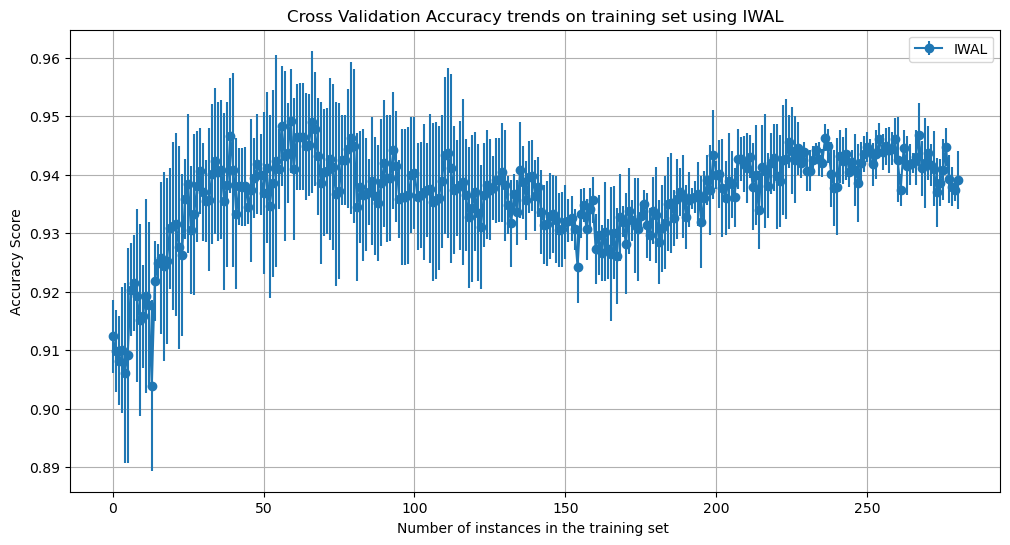

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
x_values_IWAL = list(range(len(cv_acc)))

plt.errorbar(x_values_IWAL, avg_acc_IWAL, yerr=std_acc_IWAL, fmt='-o', linestyle='-', label="IWAL")
plt.title('Cross Validation Accuracy trends on training set using IWAL')
plt.xlabel('Number of instances in the training set ')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
column_names = ["Attribute1", "Attribute2", "Attribute3", "Attribute4", "Attribute5", "Attribute6", "Attribute7", "Attribute8", "Attribute9", "Attribute10", 
                "Attribute11", "Attribute12", "Attribute13", "Attribute14", "Attribute15", "Attribute16", "Attribute17", "Attribute18", "Attribute19", "Attribute20", 
                "Attribute21", "Attribute22", "Attribute23", "Attribute24", "Attribute25", "Attribute26", "Attribute27", "Attribute28", "Attribute29", "Attribute30", 
                "Attribute31", "Attribute32", "Attribute33", "Attribute34", "Class"]
data = pd.read_csv("ionosphere/ionosphere.data", header=None, names=column_names)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
label_encoder = LabelEncoder()
data['Class_encoded'] = label_encoder.fit_transform(data['Class'])
data = data.drop(columns=['Class'])
data


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Class_encoded
0,1,0,0.47090,0.22751,0.42328,0.33598,0.25661,0.47619,0.01852,0.49471,...,0.00265,0.03574,-0.31739,0.15873,-0.21693,0.24868,-0.24339,0.26720,0.04233,1
1,1,0,0.82254,-0.07572,0.80462,0.00231,0.87514,-0.01214,0.86821,-0.07514,...,-0.02370,0.76717,-0.02731,0.74046,-0.07630,0.70058,-0.04220,0.78439,0.01214,1
2,1,0,0.89589,0.39286,0.66129,0.71804,0.29521,0.90824,-0.04787,0.94415,...,-0.85703,0.53229,-0.68593,0.74846,-0.40656,0.83142,-0.07029,0.76862,0.27926,1
3,1,0,0.68729,1.00000,0.91973,-0.76087,0.81773,0.04348,0.76087,0.10702,...,-0.53846,0.89262,0.22216,0.71070,0.53846,1.00000,-0.06522,0.56522,0.23913,0
4,1,0,0.72414,-0.01084,0.79704,0.01084,0.80000,0.00197,0.79015,0.01084,...,-0.01478,0.78041,0.00612,0.74089,-0.05025,0.82956,0.02956,0.79015,0.00788,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0,1.00000,-1.00000,1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,...,-1.00000,1.00000,-1.00000,-1.00000,-1.00000,0.00000,0.00000,1.00000,-1.00000,0
347,1,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,0.10976,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
348,1,0,1.00000,0.08013,0.96775,-0.00482,0.96683,-0.00722,0.87980,-0.03923,...,0.02003,0.93772,-0.03034,1.00000,-0.05843,0.92774,-0.03464,0.92226,-0.03673,1
349,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1


#### Passive Learning

In [13]:
def classification_passive_learning(d, seed):
    # Store average cross fold validation accuracy
    cross_fold_acc = [] 

    # Start with 20% of the data 
    sample_data, remaining_data = train_test_split(d, test_size=0.8, random_state=seed)
    sample_data_X, sample_data_y = sample_data.iloc[:, :-1], sample_data.iloc[:, -1]
    
    # Run the loop while the sample_data includes 100% of the original data
    while len(remaining_data) > 0:
        # Store accuracy from individual fold 
        fold_acc = []
        cross_val = KFold(n_splits=5, shuffle=True, random_state=seed)
        
        for train, test in cross_val.split(sample_data_X):
            features_train, features_test = sample_data_X.iloc[train], sample_data_X.iloc[test]
            labels_train, labels_test = sample_data_y.iloc[train], sample_data_y.iloc[test]
            
            model = RandomForestClassifier(random_state=None)
            model.fit(features_train, labels_train)
            y_pred = model.predict(features_test)
            acc = accuracy_score(labels_test, y_pred)
            fold_acc.append(acc)
            
        # Get the average cross fold accuracy on the training data
        avg_cross_fold_acc = np.mean(fold_acc)
        cross_fold_acc.append(avg_cross_fold_acc)


        # Move one instance from test data to training data 
        instance_to_add = remaining_data.sample(n=1)
        sample_data = pd.concat([sample_data, instance_to_add], ignore_index=True) 
        remaining_data = remaining_data.drop(instance_to_add.index)
        

    return cross_fold_acc

cv_acc_passive = [] 

for seed in tqdm(random_seeds):
    cv_acc = classification_passive_learning(data, seed)
    cv_acc_passive.append(cv_acc)

avg_acc_passive = np.mean(cv_acc_passive, axis=0)
std_acc_passive = np.std(cv_acc_passive, axis=0)


100%|██████████| 5/5 [07:18<00:00, 87.68s/it]


#### Active Learning (Uncertainty Sampling)

In [14]:
def get_entropies(labels_probs):
    entropies = [] 
    epsilon = 0.0001
    for i in labels_probs:
        prod = i * np.log2(i+epsilon)
        entropies.append(-np.sum(prod))
    return entropies

import numpy as np

def classification_active_learning(d, seed):
    cross_fold_acc = [] 

    # Start with 20% of the data 
    sample_data, remaining_data = train_test_split(d, test_size=0.8, random_state=seed)
    sample_data_X, sample_data_y = sample_data.iloc[:, :-1], sample_data.iloc[:, -1]

    # Run the loop until the sample data includes 100% of the original data 
    while len(remaining_data) > 0:
        # Store accuracy score from individual fold
        fold_acc = []
        cross_val = KFold(n_splits=5, shuffle=True, random_state=seed)
        
        for train, test in cross_val.split(sample_data_X):
            features_train, features_test = sample_data_X.iloc[train], sample_data_X.iloc[test]
            labels_train, labels_test = sample_data_y.iloc[train], sample_data_y.iloc[test]
            
            model = RandomForestClassifier(random_state=None)
            model.fit(features_train, labels_train)
            y_pred = model.predict(features_test)
            acc = accuracy_score(labels_test, y_pred)
            fold_acc.append(acc)
            
        # Get the average of the fold accuracies on the training data
        avg_cross_fold_acc = np.mean(fold_acc)
        cross_fold_acc.append(avg_cross_fold_acc)

        # Training a model on the current sample data
        X_train, y_train = sample_data.iloc[:, :-1], sample_data.iloc[:, -1]
        X_test, y_test = remaining_data.iloc[:, :-1], remaining_data.iloc[:, -1]

        mod = RandomForestClassifier(random_state=None)
        mod.fit(X_train, y_train)

        # Predicting class probabilities for the remaining data
        remaining_data_X = remaining_data.iloc[:, :-1]
        labels_probabilities = np.array(mod.predict_proba(remaining_data_X)) # 120 rows, 3 classes (columns)

        # Calculating entropies
        entropies = get_entropies(labels_probabilities)

        # Selecting the point with the highest entropy to add to the sample data 
        highest_entropy_index = np.argmax(entropies)
        sample_to_add = remaining_data.iloc[[highest_entropy_index]]

        # Adding the selected instance to the sample data
        sample_data = pd.concat([sample_data, sample_to_add], ignore_index=True)
        sample_data_X, sample_data_y = sample_data.iloc[:, :-1], sample_data.iloc[:, -1]
        # Remove that point from the remaining data
        remaining_data = remaining_data.drop(sample_to_add.index)
        
    return cross_fold_acc


cv_acc_active = []

for seed in tqdm(random_seeds):
    cv_acc = classification_active_learning(data, seed)
    cv_acc_active.append(cv_acc)

avg_acc_active = np.mean(cv_acc_active, axis=0)
std_acc_active = np.std(cv_acc_active, axis=0)


100%|██████████| 5/5 [10:16<00:00, 123.25s/it]


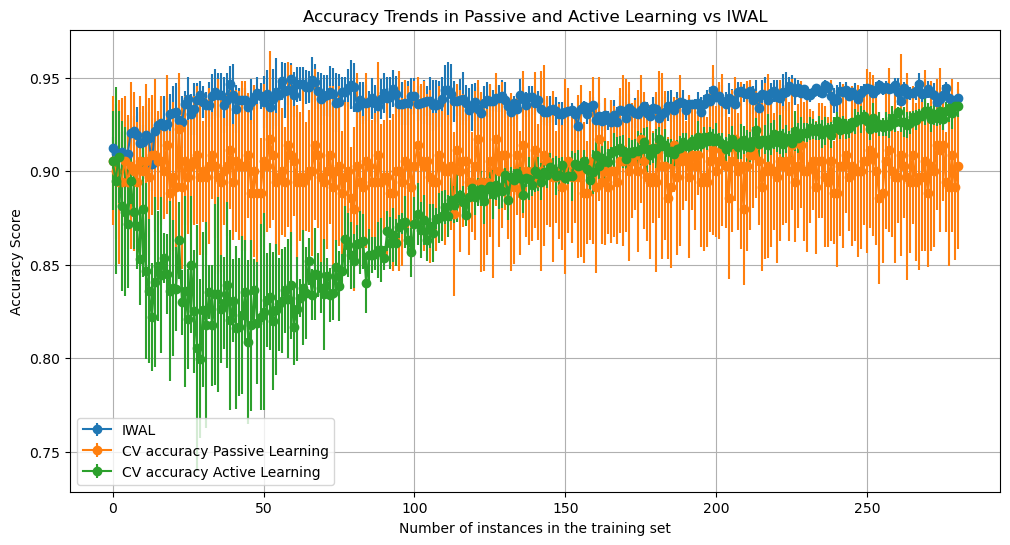

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
x_values_passive_active = list(range(len(cv_acc)))

plt.errorbar(x_values_IWAL, avg_acc_IWAL, yerr=std_acc_IWAL, fmt='-o', linestyle='-', label= "IWAL")
plt.errorbar(x_values_passive_active, avg_acc_passive, yerr=std_acc_passive, label='CV accuracy Passive Learning', fmt='-o',linestyle='-')
plt.errorbar(x_values_passive_active, avg_acc_active, yerr=std_acc_active, label='CV accuracy Active Learning', fmt='-o', linestyle='-')
plt.title('Accuracy Trends in Passive and Active Learning vs IWAL')
plt.xlabel('Number of instances in the training set')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()
